# Validation with R

## 1. Install dan Load Package

In [1]:
install.packages("ResourceSelection")
install.packages("ggplot2")
library(ResourceSelection)
library(ggplot2)
library(dplyr)

Installing package into 'C:/Users/rifat/AppData/Local/R/win-library/4.5'
(as 'lib' is unspecified)



package 'ResourceSelection' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\rifat\AppData\Local\Temp\RtmpwfgRIm\downloaded_packages


Installing package into 'C:/Users/rifat/AppData/Local/R/win-library/4.5'
(as 'lib' is unspecified)



package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\rifat\AppData\Local\Temp\RtmpwfgRIm\downloaded_packages


ResourceSelection 0.3-6 	 2023-06-27


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




## 2. Load Dataset

In [2]:
data <- read.csv("data/predictions.csv")

## 3. Hosmer-Lemeshow Test

In [3]:
hoslem.test(data$actual, data$proba, g = 10)


	Hosmer and Lemeshow goodness of fit (GOF) test

data:  data$actual, data$proba
X-squared = 8.3578, df = 8, p-value = 0.3993


## 4. Calibration Curve

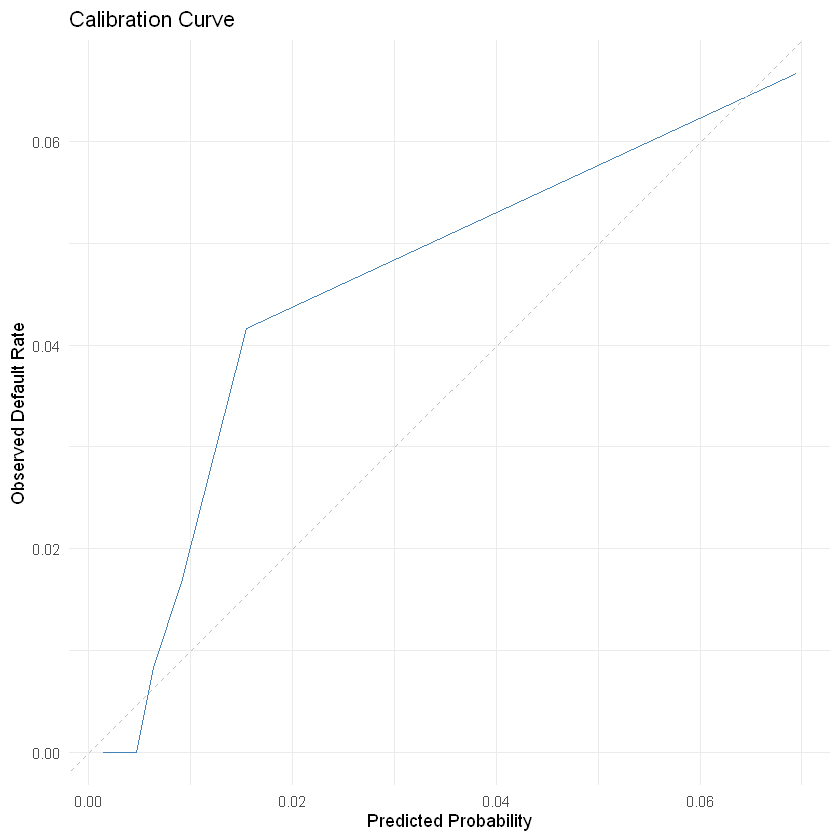

In [4]:
# Binning
calib <- data %>%
  mutate(bin = ntile(proba, 10)) %>%
  group_by(bin) %>%
  summarise(
    mean_prob = mean(proba),
    actual_rate = mean(actual)
  )

# Plot calibration curve
ggplot(calib, aes(x = mean_prob, y = actual_rate)) +
  geom_line(color = "steelblue") +
  geom_abline(slope = 1, intercept = 0, linetype = "dashed", color = "gray") +
  labs(
    title = "Calibration Curve",
    x = "Predicted Probability",
    y = "Observed Default Rate"
  ) +
  theme_minimal()
